In [40]:
%pip install glmnet
%pip install --upgrade scikit-learn


[notice] A new release of pip is available: 23.0 -> 24.0
[notice] To update, run: /home/szazo/.envs/glider/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 69.7 MB/s eta 0:00:00m eta 0:00:01:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2

[notice] A new release of pip is available: 23.0 -> 24.0
[notice] To update, run: /home/szazo/.envs/glider/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


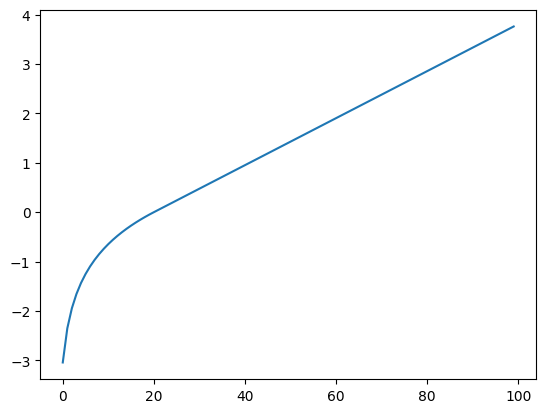

[-3.04452244 -2.35137526 -1.94591015 -1.65822808 -1.43508453 -1.25276297
 -1.09861229 -0.9650809  -0.84729786 -0.74193734 -0.64662716 -0.55961579
 -0.47957308 -0.40546511 -0.33647224 -0.27193372 -0.21130909 -0.15415068
 -0.10008346 -0.04879016  0.          0.04761905  0.0952381   0.14285714
  0.19047619  0.23809524  0.28571429  0.33333333  0.38095238  0.42857143
  0.47619048  0.52380952  0.57142857  0.61904762  0.66666667  0.71428571
  0.76190476  0.80952381  0.85714286  0.9047619   0.95238095  1.
  1.04761905  1.0952381   1.14285714  1.19047619  1.23809524  1.28571429
  1.33333333  1.38095238  1.42857143  1.47619048  1.52380952  1.57142857
  1.61904762  1.66666667  1.71428571  1.76190476  1.80952381  1.85714286
  1.9047619   1.95238095  2.          2.04761905  2.0952381   2.14285714
  2.19047619  2.23809524  2.28571429  2.33333333  2.38095238  2.42857143
  2.47619048  2.52380952  2.57142857  2.61904762  2.66666667  2.71428571
  2.76190476  2.80952381  2.85714286  2.9047619   2.9523809

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

def F(age: float, adult_age: float = 20.):
    
    if age <= adult_age:
        y = np.log(age + 1) - np.log(adult_age + 1)
    else:
        y = (age - adult_age) / (adult_age + 1)
    
    return y

age = np.arange(0, 100, 1)
y = np.vectorize(F)(age)

plt.plot(age, y)
plt.show()

print(y)



In [42]:
import pandas as pd

meta_df = pd.read_csv('data/GSE40279_family.soft-MetaData.csv', delimiter='|')
display(meta_df.head())
print('size: ', meta_df.shape)

feature_df = pd.read_csv('data/GSE40279_average_beta.txt', delimiter='\t', index_col=0).T
#feature_df = pd.read_csv('data/GSE40279_average_beta.txt', delimiter='\t', index_col=0)

display(feature_df.head())
print('size: ',feature_df.shape)



,ID,series_id,sample_title,organism_ch1,platform_id,age (y),ethnicity,gender,plate,source,tissue
0,GSM989827,GSE40279,age 67y 1001,Homo sapiens,GPL13534,67,Caucasian - European,F,1,UCSD,whole blood
1,GSM989828,GSE40279,age 89y 1002,Homo sapiens,GPL13534,89,Caucasian - European,F,1,UCSD,whole blood
2,GSM989829,GSE40279,age 66y 1003,Homo sapiens,GPL13534,66,Caucasian - European,F,1,UCSD,whole blood
3,GSM989830,GSE40279,age 64y 1004,Homo sapiens,GPL13534,64,Caucasian - European,F,1,UCSD,whole blood
4,GSM989831,GSE40279,age 62y 1005,Homo sapiens,GPL13534,62,Caucasian - European,F,1,UCSD,whole blood


size:  (656, 11)


ID_REF,cg13869341,cg14008030,cg12045430,cg20826792,cg00381604,cg20253340,cg21870274,cg03130891,cg24335620,cg16162899,...,cg27124406,cg19565306,cg22012975,cg10353737,cg22531257,cg22662321,cg06996138,cg16817496,cg07660283,cg09226288
X1001,0.849261,0.505916,0.072590,0.186961,0.036803,0.661391,0.777891,0.119538,0.782193,0.905126,...,0.079514,0.003605,0.016267,0.058144,0.016545,0.044135,0.021236,0.291702,0.727581,0.705499
X1002,0.897434,0.476842,0.079020,0.228201,0.053161,0.545065,0.776407,0.063938,0.787890,0.913628,...,0.080328,0.004043,0.008628,0.044876,0.014927,0.058587,0.019314,0.232008,0.693993,0.716328
X1003,0.751596,0.487245,0.089230,0.237660,0.045588,0.560305,0.774234,0.113279,0.788896,0.914348,...,0.079417,0.003508,0.004635,0.041357,0.024015,0.058990,0.016854,0.296456,0.703291,0.703523
X1004,0.871313,0.466692,0.076666,0.253624,0.032824,0.509904,0.772503,0.067163,0.800081,0.882308,...,0.080837,0.005296,0.006407,0.041691,0.030413,0.064237,0.019278,0.270818,0.751772,0.696888
X1005,0.775703,0.490255,0.079986,0.220404,0.035804,0.549847,0.730345,0.131637,0.759171,0.902783,...,0.084922,0.016451,0.007065,0.060183,0.015760,0.064953,0.016097,0.236963,0.746697,0.693056


size:  (656, 473034)


In [43]:
from sklearn.model_selection import train_test_split

y = meta_df['age (y)'].astype(float)
print(y, type(y))

X_train, X_test, y_train, y_test = train_test_split(feature_df, y, test_size=0.2, random_state=42)

print('X', X_train.shape, X_test.shape)
print('Y', y_train.shape, y_test.shape)

0      67.0
1      89.0
2      66.0
3      64.0
4      62.0
       ... 
651    78.0
652    71.0
653    68.0
654    61.0
655    73.0
Name: age (y), Length: 656, dtype: float64 <class 'pandas.core.series.Series'>
X (524, 473034) (132, 473034)
Y (524,) (132,)


In [34]:
from glmnet import ElasticNet

model = ElasticNet()
model = model.fit(X_train, y_train)

print(model)

ElasticNet()


In [ ]:
import sklearn
print(sklearn.__version__)

In [46]:
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)
#print(y_pred)

# compare with the y_test
print('explained_variance_score', explained_variance_score(y_test, y_pred))
print('root_mean_squared_error', np.sqrt(mean_squared_error(y_test, y_pred)))
print('r2', np.sqrt(r2_score(y_test, y_pred)))


explained_variance_score 0.861283483277061
root_mean_squared_error 5.9747623634005596
r2 0.9280221834934267
